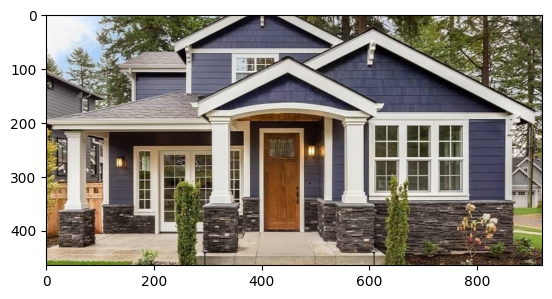

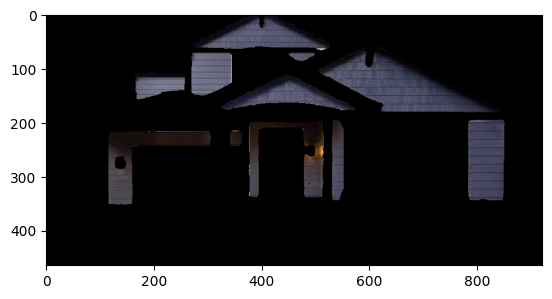

In [44]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("samples/house_2.jpg")
mask = cv2.imread("samples/house_2_mask.png",cv2.IMREAD_UNCHANGED)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

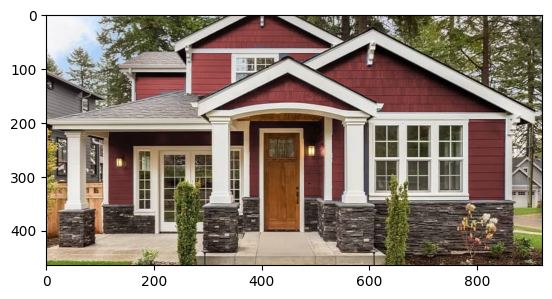

In [45]:
import numpy as np

HUE_VAL = 0
SAT_VAL = 90

hls_mask = cv2.cvtColor(mask[:,:,:3], cv2.COLOR_BGR2HLS)
_, l, _ = cv2.split(hls_mask)
new_hue = np.ones(l.shape,np.uint8)*HUE_VAL
new_sat = np.ones(l.shape,np.uint8)*SAT_VAL
hls = cv2.merge([new_hue, l,new_sat])
transformed_mask = cv2.cvtColor(hls, cv2.COLOR_HLS2BGR)

roi = (mask[:,:,-1] > 0)
transformed_img = np.zeros(img.shape,np.uint8)
transformed_img[roi] = transformed_mask[roi]
transformed_img[~roi] = img[~roi]
plt.imshow(cv2.cvtColor(transformed_img,cv2.COLOR_BGR2RGB))
plt.show()

### Extract initial color from seg mask

Median Hue: 120.0
Median Sat: 37.0


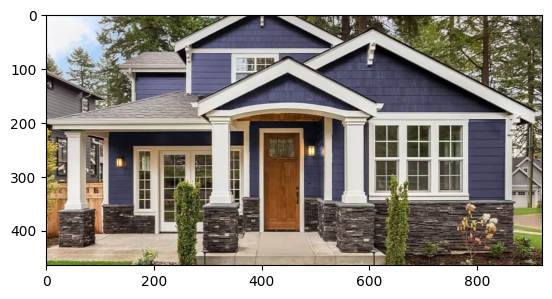

In [33]:
# split mask into hue, lightness and saturation values
h,l,s = cv2.split(hls_mask)
# valid mask pixels are those not completely transparent
roi = (mask[:,:,-1] > 0)
h_mean, s_mean = np.median(h[roi]), np.median(s[roi])
print(f"Median Hue: {h_mean}\nMedian Sat: {s_mean}")
new_hue = np.ones(l.shape,np.uint8)*int(h_mean)
new_sat = np.ones(l.shape,np.uint8)*int(s_mean)

hls = cv2.merge([new_hue, l,new_sat])
transformed_mask = cv2.cvtColor(hls, cv2.COLOR_HLS2BGR)
transformed_img = np.zeros(img.shape,np.uint8)
transformed_img[roi] = transformed_mask[roi]
transformed_img[~roi] = img[~roi]
plt.imshow(cv2.cvtColor(transformed_img,cv2.COLOR_BGR2RGB))
plt.show()

### Use reference color to paint object

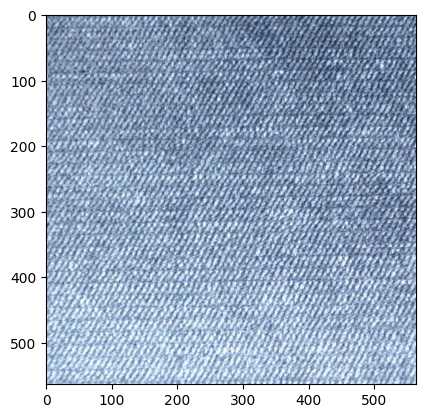

In [41]:
ref_img = cv2.imread("samples/jean_fabric.jpg")
plt.imshow(cv2.cvtColor(ref_img,cv2.COLOR_BGR2RGB))
plt.show()

Ref. Hue: 107.0
Ref. Sat: 71.0


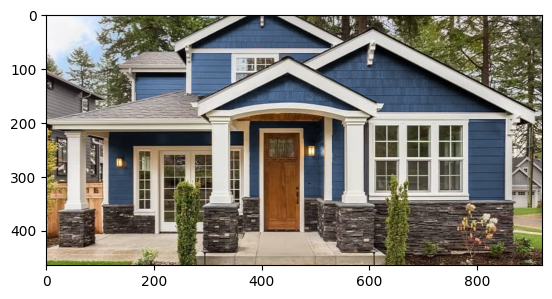

In [42]:
ref_hls = cv2.cvtColor(ref_img, cv2.COLOR_BGR2HLS)
ref_hue, _, ref_sat = cv2.split(ref_hls)
ref_hue_mean, ref_sat_mean = np.median(ref_hue), np.median(ref_sat)
print(f"Ref. Hue: {ref_hue_mean}\nRef. Sat: {ref_sat_mean}")

# split mask into hue, lightness and saturation values
_,l,_ = cv2.split(hls_mask)
new_hue = np.ones(l.shape,np.uint8)*int(ref_hue_mean)
new_sat = np.ones(l.shape,np.uint8)*int(ref_sat_mean)
hls = cv2.merge([new_hue, l,new_sat])

# valid mask pixels are those not completely transparent
roi = (mask[:,:,-1] > 0)
transformed_mask = cv2.cvtColor(hls, cv2.COLOR_HLS2BGR)
transformed_img = np.zeros(img.shape,np.uint8)
transformed_img[roi] = transformed_mask[roi]
transformed_img[~roi] = img[~roi]
plt.imshow(cv2.cvtColor(transformed_img,cv2.COLOR_BGR2RGB))
plt.show()